### Question 2
Take a mixture of Gaussian and Uniform distribution (say by clearly separating the mean) and see that you can approximate the distribution a) by Parzen Window and b) KNN density. Vary k, h, and n and observe the accuracy of the computed density with true density (Use plot)

#### Parzen

In [145]:
import numpy as np
import matplotlib.pyplot as plt
rand=np.random.default_rng()

In [146]:
#x0=rand.normal(120,12,10)
#x0

In [147]:
#xU=rand.uniform(-10,10,10)

In [193]:
def Generate(n):
    mean=120
    std=12
    xG=rand.normal(120,12,n)
    xU=rand.uniform(-10,10,n)
    X=np.concatenate((xG,xU),None)
    np.random.shuffle(X)
    return X

In [148]:
def gauss_func(x,xi,h):
    out1=np.exp(-0.5*((x-xi)**2/h**2))
    final1=1/np.sqrt(2*3.14*h)
    output1=final1*out1
    return output1

In [188]:
def gaussian(data,h1):
    points1 = np.linspace(min(data)-h1/2,max(data)+h1/2,100)
    final0=[]
    res0=0
    for i in points1:    
        i=round(i,2)
        for itr in data:
            res0=res0+gauss_func(i,itr,h1)
        result1=(1/len(data))*res0 
        res0=0
        final0.append(result1)
    plt.plot(points1,final0,color='b')
    plt.show()
    

In [194]:
X=Generate(10)
X

array([  6.75477283, 122.51766461,  -4.44406447,  -8.48469725,
       136.59485768,   5.33462675, 122.09124055,  -5.53863106,
        -0.7588007 , 125.56561608, 119.37316231, 121.65849789,
       122.36077493,  -5.79341055,   9.46378731,  -2.68468481,
       112.87246914, 144.10900901,   9.47406876, 118.42999613])

Varying the h

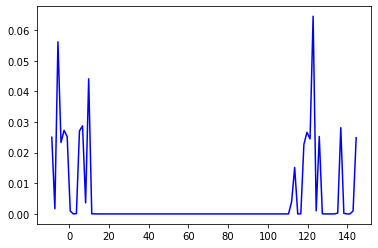

In [195]:
gaussian(X,0.5)

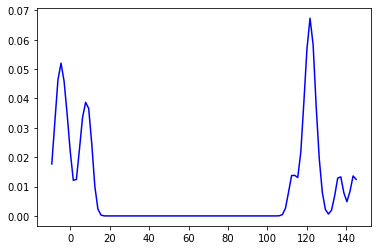

In [196]:
gaussian(X,2)

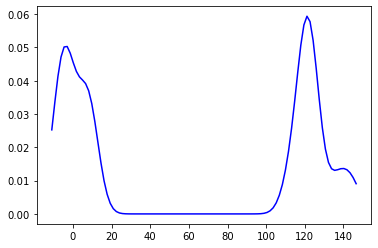

In [197]:
gaussian(X,5)

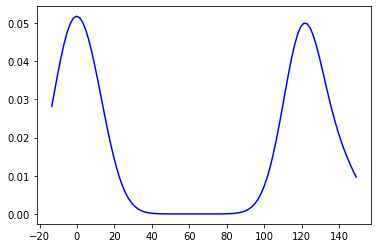

In [198]:
gaussian(X,10)

#### KNN

In [164]:
def probability_density_knn(sample, k, x):
    n = sample.size
    
    d = sample.ndim
    if d == 1:
        V = 2
    elif d == 2:
        V = np.pi
    elif d == 3:
        V = (4 / 3) * np.pi
    else:
        return
    
    # R is the distance from x to its kth nearest neighbour
    distance_from_x = np.absolute(sample - x)
    distance_from_x = np.sort(distance_from_x)
    R = distance_from_x[k]
    
    try:
        probability_density = (k / n) * (1 / (V * R) )
    except:
        print(f"k = {k}")
        print(f"n = {n}")
        print(f"V = {V}")
        print(f"R = {R}")
    return probability_density

In [206]:
def knn(sample, k):
    probability_density = [0]*len(sample)
    for i in range(sample.size):
        probability_density[i] = probability_density[i] +probability_density_knn(sample, k, sample[i])
    plt.scatter(sample, probability_density)
    plt.show()
    

Varying the k

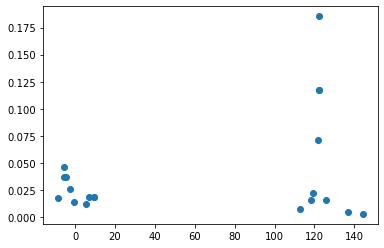

In [207]:
knn(X, 2)

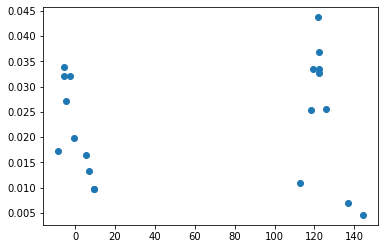

In [208]:
knn(X,4 )

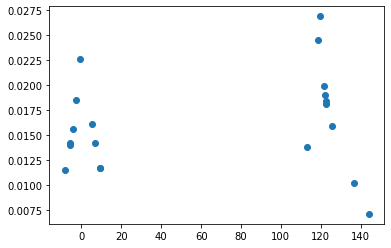

In [209]:
knn(X, 7)

##### Increasing the sample size n to 4000

Parzen:

In [199]:
X_new=Generate(2000)
X_new

array([ 9.11830890e+00, -3.51102848e-02, -7.43154823e+00, ...,
        1.34803686e+02,  1.18110998e+02,  1.22604492e+02])

Parzen (varying values of h)

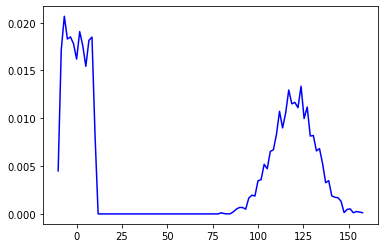

In [200]:
gaussian(X_new,0.5)

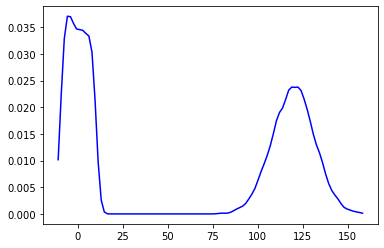

In [201]:
gaussian(X_new,2)

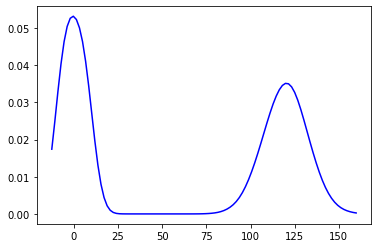

In [203]:
gaussian(X_new,5)

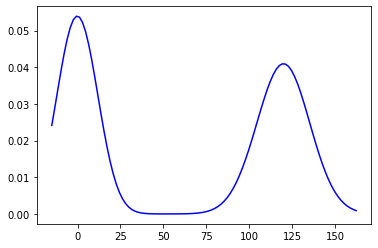

In [204]:
gaussian(X_new,10)

KNN (varying values of K):

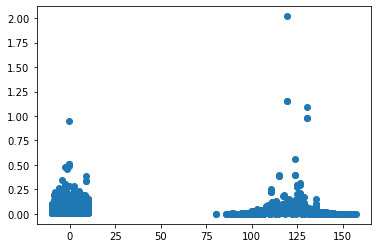

In [214]:
knn(X_new,2)

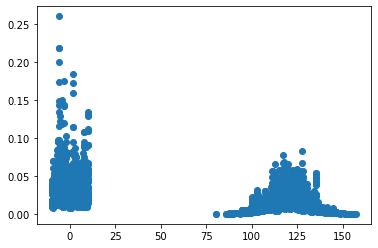

In [217]:
knn(X_new, 4)

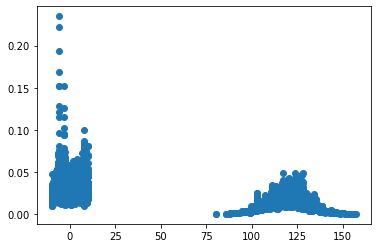

In [219]:
knn(X_new, 7)

##### Comparing with true density

Case1 (Parzen)

In [220]:
X

array([  6.75477283, 122.51766461,  -4.44406447,  -8.48469725,
       136.59485768,   5.33462675, 122.09124055,  -5.53863106,
        -0.7588007 , 125.56561608, 119.37316231, 121.65849789,
       122.36077493,  -5.79341055,   9.46378731,  -2.68468481,
       112.87246914, 144.10900901,   9.47406876, 118.42999613])

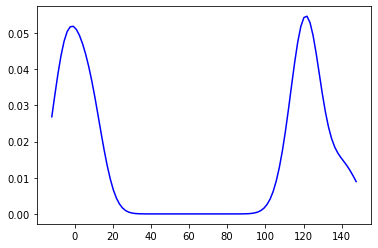

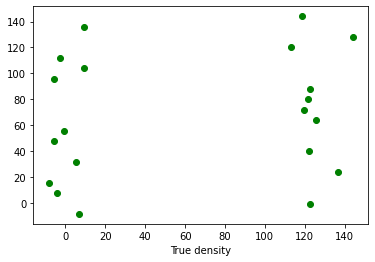

In [276]:

gaussian(X,7)
plt.xlabel("True density")
plt.scatter(X,np.linspace(min(X),max(X),20),color='g')
plt.show()


Case 1 (KNN)

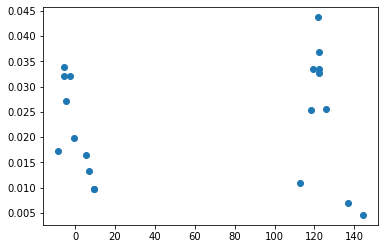

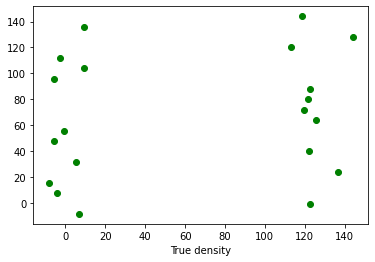

In [277]:
knn(X,4)
plt.xlabel("True density")
plt.scatter(X,np.linspace(min(X),max(X),20),color='g')
plt.show()

Case 2: (Parzen)

In [263]:
X_new

array([ 9.11830890e+00, -3.51102848e-02, -7.43154823e+00, ...,
        1.34803686e+02,  1.18110998e+02,  1.22604492e+02])

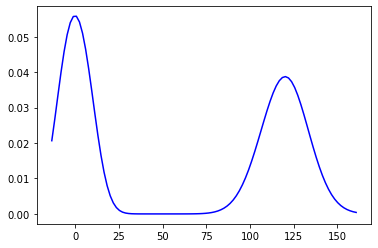

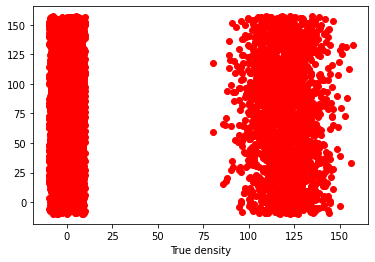

In [275]:
gaussian(X_new,7)
plt.xlabel("True density")
plt.scatter(X_new,np.linspace(min(X_new),max(X_new),4000),color='r')
plt.show()


Case 2: (KNN)

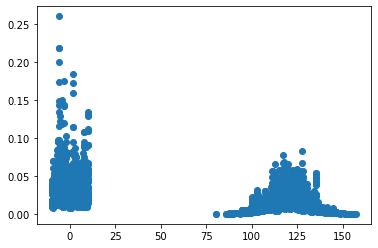

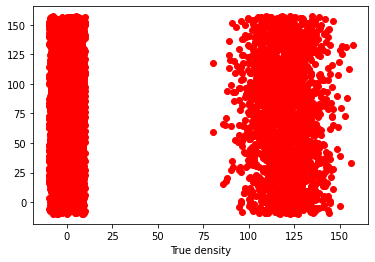

In [274]:
knn(X_new, 4)
plt.xlabel("True density")
plt.scatter(X_new,np.linspace(min(X_new),max(X_new),4000),color='r')
plt.show()